In [1]:
import random
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt

lin reg

predict number of licenses

predictors:
* org size
* use it for
* tech budget
* renew (T/F)
* date of purchase (annual)
* trial (T/F)
* account holder


individual plan = 1 license @ $79.99 a year
basic enterprise package = 20 licenses @ $60 a year per user (min 5)
pro enterprise package = 100 licenses @ $40 a year per user (min 50)
adv enterprise package = 800 @ $28 a year per user (min 500)

For more than 60 users, cheaper to get pro than basic

In [21]:
fake = Faker()

In [22]:
def name_generator():
    return fake.first_name() + ' ' + fake.last_name()

In [94]:
from random import randrange
from datetime import timedelta

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return pd.to_datetime(str(start + timedelta(seconds=random_second))[0:10], format = '%Y-%m-%d')

In [95]:
random_date(pd.to_datetime('01/01/2022'), pd.to_datetime('01/01/2023'))

Timestamp('2022-04-19 00:00:00')

In [96]:
max_emps = {'small' : [5, 50], 'medium' : [50, 150], 'large' : [150, 800], 'vlarge' : [800, 2000]}
factos = {'Data Analysis' : [0.75, 0.15], 'Tracking KPIs' : [0.55, 0.2], 
          'Accounting' : [0.3, 0.1], 'Data Management' : [0.6, 0.19] }
budgets_dic = {'small' : [1000, 5000], 'medium' : [4500, 10000], 'large' : [9000, 20000], 'vlarge' : [18000, 25000]}

def org_size_gen(renew, use, budget = 1 , no_emps = 1):
    if renew == False:
        category = random.choices(population = ['small', 'medium', 'large', 'vlarge'], weights = [0.2, 0.4, 0.3, 0.1], k = 1)[0]
        no_emps = random.randint(max_emps[category][0], max_emps[category][1])
        bud = random.randint(budgets_dic[category][0], budgets_dic[category][1])
        no_license = int(round(no_emps * np.random.uniform(factos[use][0], factos[use][1]),0))
        if no_license > no_emps:
            no_license = no_emps
        if no_license < 50:
            acc_type = 'basic'
        elif no_license < 500:
            acc_type = 'pro'
        else:
            acc_type = 'advanced'
    else:
        if no_emps < 100:
            growth = np.random.normal(1.2, 0.3)
        elif no_emps < 500:
            growth = np.random.normal(1.08, 0.4)
        elif no_emps < 1000:
            growth = np.random.normal(1.05, 0.2)
        else:
            growth = np.random.normal(1.04, 0.08)
        no_emps = int(round(no_emps * growth,0))
        bud = int(round(budget * np.random.normal(1.05, 0.02),0))
        no_license = int(round(no_emps * np.random.uniform(factos[use][0], factos[use][1]),0))
        if no_license > no_emps:
            no_license = no_emps
        if no_license < 50:
            acc_type = 'basic'
        elif no_license < 500:
            acc_type = 'pro'
        else:
            acc_type = 'advanced'
    return no_emps, no_license, acc_type, bud

In [112]:
purc_id = []
org_size = []
renew = []
date_of_purc = []
uses = []
budgets = []
account_id = []
trial = []
account_holder = []
account_name = []
plan = []
licenses = []
ids = 129

for i in range(random.randint(1000, 2000)):
    ac_type = random.choices(population = ['individual', 'other'], weights = [0.1, 0.9], k = 1)[0]
    if ac_type == 'individual':
        licenses.append(1)
        plan.append(ac_type)
        na = name_generator()
        account_holder.append(na)
        account_name.append(na)
        aid = 'I' + str(random.randint(1000, 9999))
        account_id.append(aid)
        trial.append(True)
        date = random_date(pd.to_datetime('01/01/2020', format = '%d/%m/%Y'), pd.to_datetime('01/01/2024', format = '%d/%m/%Y'))
        date_of_purc.append(date)
        renew.append(False)
        org_size.append(1)
        purc_id.append(ids)
        uses.append('Personal')
        budgets.append(79.99)
        ids += 1
        status = False
        while status is False:
            year = date.year
            if date.year < 2024:
                renew_roll = random.randint(0, 10)
                if renew_roll > 4:
                    year += 1
                    licenses.append(1)
                    plan.append(ac_type)
                    account_holder.append(na)
                    account_name.append(na)
                    account_id.append(aid)
                    trial.append(False)
                    try:
                        date_of_purc.append(pd.to_datetime(str(date.day) + '/' + str(date.month) + '/' + str(year), format = '%d/%m/%Y'))
                    except:
                        date_of_purc.append(pd.to_datetime('01/03/' + str(year), format = '%d/%m/%Y'))
                    renew.append(True)
                    org_size.append(1)
                    purc_id.append(ids)
                    uses.append('Personal')
                    budgets.append(79.99)
                    ids += 1
                else:
                    status = True
            else:
                status = True
    else:
        renew.append(False)
        trial.append(True)
        na = name_generator()
        account_holder.append(na)
        comp = fake.company()
        account_name.append(comp)
        date = random_date(pd.to_datetime('01/01/2020', format = '%d/%m/%Y'), pd.to_datetime('01/01/2024', format = '%d/%m/%Y'))
        date_of_purc.append(date)
        purc_id.append(ids)
        use = random.choices(population = ['Data Analysis', 'Tracking KPIs', 'Accounting', 'Data Management'],
                                weights = [0.4, 0.3, 0.1, 0.2], k = 1)[0]
        uses.append(use)
        ids += 1
        org = org_size_gen(False, use, 1, 1)
        employess = org[0]
        license = org[1]
        accc_type = org[2]
        buget = org[3]
        aid = 'C' + str(random.randint(1000, 9999))
        account_id.append(aid)
        org_size.append(employess)
        plan.append(accc_type)
        budgets.append(buget)
        licenses.append(license)
        status = False
        while status is False:
            year = date.year
            if date.year < 2024:
                renew_roll = random.randint(0, 10)
                if renew_roll > 4:
                    year += 1
                    account_holder.append(na)
                    account_name.append(comp)
                    trial.append(False)
                    try:
                        date_of_purc.append(pd.to_datetime(str(date.day) + '/' + str(date.month) + '/' + str(year), format = '%d/%m/%Y'))
                    except:
                        date_of_purc.append(pd.to_datetime('01/03/' + str(year), format = '%d/%m/%Y'))
                    renew.append(True)
                    purc_id.append(ids)
                    uses.append(use)
                    account_id.append(aid)
                    ids += 1
                    org = org_size_gen(True, use, buget, employess)
                    employess = org[0]
                    license = org[1]
                    accc_type = org[2]
                    buget = org[3]
                    org_size.append(employess)
                    plan.append(accc_type)
                    budgets.append(buget)
                    licenses.append(license)
                else:
                    status = True
            else:
                status = True

In [113]:
df = pd.DataFrame({'sale_id' : purc_id, 'licenses_bought' : licenses, 'account_id' : account_id, 'account_holder' : account_holder,
                   'company' : account_name, 'trial_period' : trial, 'account_renewed' : renew,
                   'sale_date': date_of_purc, 'intended_use' : uses, 'organization_size' : org_size, 'budget' : budgets,
                   'account_plan' : plan})

In [114]:
df = df.sort_values(by = 'sale_date')

In [119]:
sid = []
n = 182
for i in range(len(df)):
    sid.append(n)
    n+=1
df['sale_id'] = sid
df = df.set_index('sale_id')

In [100]:
from sklearn.linear_model import LinearRegression

In [117]:
lr = LinearRegression().fit(df[['organization_size', 'budget']],df.licenses_bought)

In [121]:
df.to_csv('renhaas_licenses.csv')

log reg

errors - slow performance (mid), visualization rendering (mid), user interface (low), limited options (low), system outage (high), data loss (high), inability to login (high), frozen (high)

other factor - number of live users

forecasting
row_id
timestamp
country
number of users

In [130]:
import datetime

In [ ]:
0 - 6 or 21 -24
6 - 9 or 17 - 21
9 - 12
13
13 - 17

In [147]:
if start_time in pub_holidays['US']:
    print('no')

In [148]:
timestamps = []
country = []
users = []
max_users = {'US' : [250, 3000, 10000, 3000, 13000], 'CA' : [120, 1500, 8000, 1500, 10000], 'UK' : [100, 1000, 5000, 800, 8000],
            'FR' : [50, 800, 3000, 100, 3500], 'DE' : [20, 300, 1000, 100, 4000]}
std_users = {'US' : [25, 100, 500, 100, 600], 'CA' : [15, 200, 300, 100, 400], 'UK' : [20, 200, 400, 150, 600],
            'FR' : [10, 100, 150, 20, 200], 'DE' : [6, 100, 140, 10, 180]}
pub_holidays = {'US' : [pd.to_datetime('10/11/2023', format = '%d/%m/%Y'), pd.to_datetime('23/11/2023', format = '%d/%m/%Y'),
                       pd.to_datetime('25/12/2023', format = '%d/%m/%Y')],
                'CA' : [pd.to_datetime('09/10/2023', format = '%d/%m/%Y'), pd.to_datetime('11/11/2023', format = '%d/%m/%Y'),
                       pd.to_datetime('25/12/2023', format = '%d/%m/%Y')],
                'UK' : [pd.to_datetime('25/12/2023', format = '%d/%m/%Y'), pd.to_datetime('26/12/2023', format = '%d/%m/%Y')],
                'FR' : [pd.to_datetime('01/11/2023', format = '%d/%m/%Y'), pd.to_datetime('11/11/2023', format = '%d/%m/%Y'),
                       pd.to_datetime('25/12/2023', format = '%d/%m/%Y')],
                'DE' : [pd.to_datetime('03/10/2023', format = '%d/%m/%Y'), pd.to_datetime('25/12/2023', format = '%d/%m/%Y'),
                       pd.to_datetime('26/12/2023', format = '%d/%m/%Y')]}

start_time = pd.to_datetime('01/10/2023 00:00:00', format = '%d/%m/%Y %H:%M:%S')

while start_time < pd.to_datetime('01/01/2024 00:00:00', format = '%d/%m/%Y %H:%M:%S'):
    for c in ['US', 'CA', 'UK', 'FR', 'DE']:
        if c == 'US':
            tz = random.choices([-4, -5, -6, -7], [0.5, 0.1, 0.1, 0.3], k=1)[0]
        elif c == 'CA':
            tz = random.choices([-4, -6, -7, -8], [0.4, 0.1, 0.1, 0.4], k=1)[0]
        elif c == 'UK':
            tz = 0
        else:
            tz = 1
        if start_time not in pub_holidays[c] and start_time.weekday() < 5:
            if start_time.hour + tz < 6 or start_time.hour + tz >= 21:
                users.append(int(round(np.random.normal(max_users[c][0], std_users[c][0]),0)))
                timestamps.append(start_time)
                country.append(c)
            elif start_time.hour + tz < 9 or start_time.hour + tz >= 17:
                users.append(int(round(np.random.normal(max_users[c][1], std_users[c][1]),0)))
                timestamps.append(start_time)
                country.append(c)
            elif start_time.hour + tz < 13:
                users.append(int(round(np.random.normal(max_users[c][2], std_users[c][2]),0)))
                timestamps.append(start_time)
                country.append(c)
            elif start_time.hour + tz ==13:
                users.append(int(round(np.random.normal(max_users[c][3], std_users[c][3]),0)))
                timestamps.append(start_time)
                country.append(c)
            else:
                users.append(int(round(np.random.normal(max_users[c][4], std_users[c][4]),0)))
                timestamps.append(start_time)
                country.append(c)
        else:
            print('yes')
            users.append(int(round(np.random.normal(max_users[c][0], std_users[c][0]),0)))
            timestamps.append(start_time)
            country.append(c)
    start_time = start_time + datetime.timedelta(hours = 1)

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [150]:
df2 = pd.DataFrame({'timestamp' : timestamps, 'country' : country, 'users' : users})

In [169]:
df2.to_csv('renhaas_users.csv', index = False)

C:\Users\alastair.tyson\AppData\Local\Temp\ipykernel_65908\214761517.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2[(df2.country == 'US') & (df2.timestamp < pd.to_datetime('05/10/2023', format = '%d/%m/%Y'))].set_index('timestamp').resample('H').mean().plot(ax = ax)
C:\Users\alastair.tyson\AppData\Local\Temp\ipykernel_65908\214761517.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2[(df2.country == 'UK') & (df2.timestamp < pd.to_datetime('05/10/2023', format = '%d/%m/%Y'))].set_index('timestamp').resample('H').mean().plot(ax=ax)
C:\Users\alastair.tyson\AppData\Local\Temp\ipykernel_65908\21476

<Axes: xlabel='timestamp'>

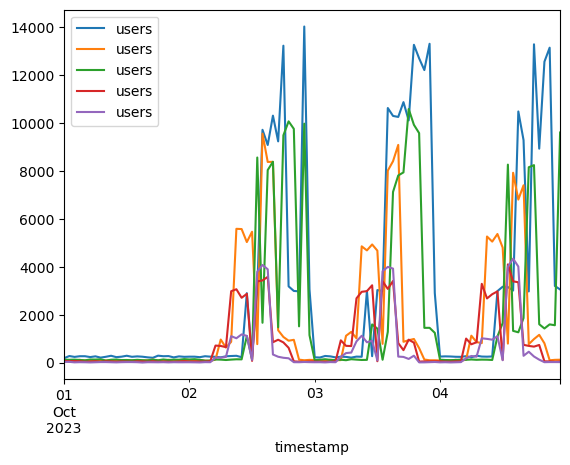

In [168]:
fig, ax = plt.subplots()
df2[(df2.country == 'US') & (df2.timestamp < pd.to_datetime('05/10/2023', format = '%d/%m/%Y'))].set_index('timestamp').resample('H').mean().plot(ax = ax)
df2[(df2.country == 'UK') & (df2.timestamp < pd.to_datetime('05/10/2023', format = '%d/%m/%Y'))].set_index('timestamp').resample('H').mean().plot(ax=ax)
df2[(df2.country == 'CA') & (df2.timestamp < pd.to_datetime('05/10/2023', format = '%d/%m/%Y'))].set_index('timestamp').resample('H').mean().plot(ax=ax)
df2[(df2.country == 'FR') & (df2.timestamp < pd.to_datetime('05/10/2023', format = '%d/%m/%Y'))].set_index('timestamp').resample('H').mean().plot(ax=ax)
df2[(df2.country == 'DE') & (df2.timestamp < pd.to_datetime('05/10/2023', format = '%d/%m/%Y'))].set_index('timestamp').resample('H').mean().plot(ax=ax)

errors - slow performance (mid), visualization rendering (mid), user interface (low), limited options (low), system outage (high), data loss (high), inability to login (high), frozen (high)

other factor - number of live users

In [250]:
g = df2.set_index('timestamp').resample('H').sum(numeric_only = True).reset_index()

timestamp = []
report_id = []
active_users = []
local = []
report_error = []
severity = []
n = 1001
sev_chance = {'low' : 0.000005, 'med' : 0.00001, 'high' : 0.00055}
mod_chance = {'low' : 0.00002, 'med' : 0.00025, 'high' : 0.0003}

start_time = pd.to_datetime('01/10/2023 00:00:00', format = '%d/%m/%Y %H:%M:%S')

for i in range(len(g)):
    ts = g.iloc[i, 0]
    users = g.iloc[i, 1]
    if users < 20000:
        chance = 'low'
    elif users < 30000:
        chance = 'med'
    else:
        chance = 'high'
        
    sev_reports = int(round(users * np.random.normal(sev_chance[chance], 0.000001), 0))
    mod_reports = int(round(users * np.random.normal(mod_chance[chance], 0.000001), 0))
    
    for j in range(sev_reports):
        error = random.choices(['Data Loss', 'Login', 'Frozen', 'System Outage', 'Slow'],
                              [0.1, 0.3, 0.25, 0.2, 0.15])[0]
        timestamp.append(ts)
        report_id.append(n)
        n += 1
        severity.append('high')
        report_error.append(error)
        active_users.append(users)
    for k in range(mod_reports):
        error = random.choices(['Data Loss', 'Login', 'Frozen', 'System Outage', 'Slow', 'Rendering', 'UX'],
                              [0.05, 0.1, 0.2, 0.05, 0.3, 0.1, 0.2])[0]
        timestamp.append(ts)
        report_id.append(n)
        n += 1
        severity.append('low')
        report_error.append(error)
        active_users.append(users)

In [251]:
df3 = pd.DataFrame({'report_id': report_id, 'timestamp' : timestamp, 'error_type' : report_error, 'severity' : severity,
                   'active_users' : active_users})

In [252]:
df3

,report_id,timestamp,error_type,severity,active_users
0,1001,2023-10-02 14:00:00,System Outage,low,28476
1,1002,2023-10-02 14:00:00,Data Loss,low,28476
2,1003,2023-10-02 14:00:00,Rendering,low,28476
3,1004,2023-10-02 14:00:00,Login,low,28476
4,1005,2023-10-02 14:00:00,Slow,low,28476
...,...,...,...,...,...
2960,3961,2023-12-29 20:00:00,UX,low,22248
2961,3962,2023-12-29 20:00:00,UX,low,22248
2962,3963,2023-12-29 20:00:00,Data Loss,low,22248
2963,3964,2023-12-29 20:00:00,UX,low,22248


In [255]:
df3.to_csv('renhaas_error_reports.csv',index = False)

In [267]:
tryial = pd.get_dummies(df3, columns = ['error_type'])

In [268]:
tryial.head()

,report_id,timestamp,severity,active_users,error_type_Data Loss,error_type_Frozen,error_type_Login,error_type_Rendering,error_type_Slow,error_type_System Outage,error_type_UX
0,1001,2023-10-02 14:00:00,low,28476,0,0,0,0,0,1,0
1,1002,2023-10-02 14:00:00,low,28476,1,0,0,0,0,0,0
2,1003,2023-10-02 14:00:00,low,28476,0,0,0,1,0,0,0
3,1004,2023-10-02 14:00:00,low,28476,0,0,1,0,0,0,0
4,1005,2023-10-02 14:00:00,low,28476,0,0,0,0,1,0,0


In [256]:
from sklearn.linear_model import LogisticRegression

In [264]:
tryial.columns

Index(['report_id', 'timestamp', 'active_users', 'error_type_Data Loss',
       'error_type_Frozen', 'error_type_Login', 'error_type_Rendering',
       'error_type_Slow', 'error_type_System Outage', 'error_type_UX',
       'severity_high', 'severity_low'],
      dtype='object')

In [270]:
lr = LogisticRegression().fit(tryial[['error_type_Data Loss',
       'error_type_Frozen', 'error_type_Login', 'error_type_Rendering',
       'error_type_Slow', 'error_type_System Outage', 'error_type_UX']], tryial.severity)

lr.score(tryial[['error_type_Data Loss',
       'error_type_Frozen', 'error_type_Login', 'error_type_Rendering',
       'error_type_Slow', 'error_type_System Outage', 'error_type_UX']], tryial.severity)

0.8219224283305228

In [271]:
df3.severity.value_counts(normalize = True)

low     0.819562
high    0.180438
Name: severity, dtype: float64

In [231]:
np.random.normal(sev_chance[chance], 0.01)

0.0006231407385823729

In [190]:
sev_reports

0